# Homework 6, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [1]:
import pandas as pd

In [35]:
import matplotlib

## Read in the file `craftcans.csv`, and look at the first first rows

In [20]:
df = pd.read_csv("craftcans.csv")
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25


## How many rows do you have in the data? What are the column types?

In [4]:
df.shape

(2416, 7)

# Checking out our alcohol

## What are the top 10 producers of cans of beer?

In [18]:
df.Brewery.value_counts()

Brewery Vivant                     62
Oskar Blues Brewery                46
Sun King Brewing Company           38
Cigar City Brewing Company         25
Sixpoint Craft Ales                24
Hopworks Urban Brewery             23
Stevens Point Brewery              22
21st Amendment Brewery             20
Great Crescent Brewery             20
Bonfire Brewing Company            19
SanTan Brewing Company             19
Great River Brewery                18
Anderson Valley Brewing Company    18
Upslope Brewing Company            18
Tallgrass Brewing Company          18
Sockeye Brewing Company            17
New Belgium Brewing Company        17
Golden Road Brewing                15
Rivertowne Brewing Company         15
Caldera Brewing Company            14
18th Street Brewery                14
Southern Star Brewing Company      14
Blue Blood Brewing Company         14
Against the Grain Brewery          13
Sly Fox Brewing Company            13
Minhas Craft Brewery               13
Surly Brewin

## What is the most common ABV? (alcohol by volume)

In [19]:
df.ABV.value_counts()

5.00%     215
5.50%     158
6.00%     125
6.50%     123
5.20%     107
7.00%      92
4.50%      89
4.80%      72
5.80%      66
5.60%      66
5.10%      62
5.30%      60
6.20%      59
4.90%      59
4.70%      57
8.00%      57
6.80%      52
5.70%      52
5.40%      50
7.50%      43
4.20%      38
6.30%      38
4.00%      38
7.20%      37
9.90%      35
5.90%      34
6.90%      32
4.60%      32
8.50%      26
6.70%      25
         ... 
9.50%       9
4.10%       9
8.30%       8
7.40%       8
7.90%       7
3.50%       6
3.80%       6
8.80%       6
9.30%       5
9.70%       5
9.60%       5
7.60%       5
3.70%       4
8.60%       4
8.10%       4
9.10%       3
8.40%       3
3.20%       3
9.80%       3
8.90%       2
2.70%       2
10.40%      1
2.80%       1
3.40%       1
12.00%      1
12.80%      1
10.00%      1
0.10%       1
9.40%       1
12.50%      1
Name: ABV, Length: 74, dtype: int64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [27]:
df.ABV.dtype

dtype('O')

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [21]:
df['ABV'] = df.ABV.str.replace('%', "")

In [23]:
df['ABV'] = df.ABV.astype(float)


### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [24]:
df.ABV.dtype

dtype('float64')

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [28]:
df.ABV.mean()

5.977342419080068

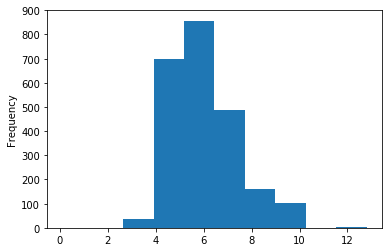

In [36]:
df['ABV'].describe()
df['ABV'].plot('hist')

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [42]:
#68
df.ABV.isnull().value_counts()

False    2348
True       68
Name: ABV, dtype: int64

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [46]:
df.Location.value_counts()

Grand Rapids, MI      66
Chicago, IL           55
Portland, OR          52
Indianapolis, IN      43
San Diego, CA         42
Boulder, CO           41
Denver, CO            40
Brooklyn, NY          38
Seattle, WA           35
Longmont, CO          33
San Francisco, CA     32
Tampa, FL             31
Stevens Point, WI     30
Austin, TX            25
Fort Collins, CO      22
Boston, MA            21
Cincinnati, OH        21
Aurora, IN            20
Chandler, AZ          19
Saint Louis, MO       19
Eagle, CO             19
Manhattan, KS         18
Boonville, CA         18
Missoula, MT          18
Davenport, IA         18
Boise, ID             17
Salt Lake City, UT    17
San Antonio, TX       16
Astoria, OR           16
Durango, CO           16
                      ..
Lombard, IL            1
Everett, MA            1
Douglas, MI            1
Covington, LA          1
Boynton Beach, FL      1
South Bend, IN         1
Wilmington, DE         1
Waynesville, NC        1
Abingdon, VA           1


## List all of the beer from Brooklyn, NY

In [50]:
df[df.Location.str.contains("Brooklyn.*NY", na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,Does not apply
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,Does not apply
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,Does not apply
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19


## What brewery in Brooklyn puts out the most cans of beer?

In [63]:
df1 = df[df.Location.str.contains("Brooklyn.*NY", na=False)]

df1.Brewery.value_counts()

Sixpoint Craft Ales    24
Brooklyn Brewery        6
Evil Twin Brewing       5
KelSo Beer Company      3
Name: Brewery, dtype: int64

## What are the five most popular styles of beer produced by Sixpoint?

In [67]:
df2 = df[df.Brewery.str.contains("Sixpoint", na=False)]
df2.Style.value_counts()

American IPA                      4
Baltic Porter                     2
Cream Ale                         2
German Pilsener                   2
Rye Beer                          2
American Double / Imperial IPA    2
Gose                              1
American Pale Wheat Ale           1
Belgian Pale Ale                  1
American Pale Ale (APA)           1
Saison / Farmhouse Ale            1
American Strong Ale               1
Fruit / Vegetable Beer            1
American Brown Ale                1
American Stout                    1
Pumpkin Ale                       1
Name: Style, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [73]:
df3 = df[df.Location.str.contains("NY", na=False)].Brewery.value_counts()
df3

Sixpoint Craft Ales              24
Matt Brewing Company             13
Brooklyn Brewery                  6
Evil Twin Brewing                 5
Butternuts Beer and Ale           4
Blue Point Brewing Company        4
The Bronx Brewery                 3
KelSo Beer Company                3
Upstate Brewing Company           2
Montauk Brewing Company           2
Chatham Brewing                   2
Bomb Beer Company                 2
The Manhattan Brewing Company     1
Dundee Brewing Company            1
Southampton Publick House         1
Newburgh Brewing Company          1
Name: Brewery, dtype: int64

### Now *count* all of the breweries in New York state

In [75]:
df[df.Location.str.contains("NY", na=False)].Brewery.value_counts().shape

(16,)

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [91]:
#df[df.Style.str.contains("IPA", na=False)]
df.IBUs

0        50.0
1        26.0
2        19.0
3        38.0
4        25.0
5        47.0
6        68.0
7        80.0
8        25.0
9        42.0
10       25.0
11       21.0
12       13.0
13       17.0
14       68.0
15       38.0
16        NaN
17       65.0
18       20.0
19       18.0
20       15.0
21       80.0
22       65.0
23       45.0
24      100.0
25       85.0
26       24.0
27      100.0
28       30.0
29       28.0
        ...  
2386     30.0
2387     65.0
2388      NaN
2389      NaN
2390     42.0
2391     35.0
2392     40.0
2393      NaN
2394    113.0
2395     21.0
2396     11.0
2397     44.0
2398     40.0
2399     37.0
2400     34.0
2401     45.0
2402     45.0
2403    120.0
2404     20.0
2405     33.0
2406     99.0
2407     35.0
2408     65.0
2409     17.0
2410     98.0
2411     35.0
2412    100.0
2413     35.0
2414     85.0
2415     65.0
Name: IBUs, Length: 2416, dtype: float64

IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [80]:
df.IBUs.mean()

TypeError: must be str, not int

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

1. Do the `.replace` and `np.nan` thing we did in class. Then convert the column to a number. This is boring.
2. When you're reading in your csv, there [is an option called `na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). You can give it a list of **numbers or strings to count as `NaN`**. It's a lot easier than doing the `np.nan` thing, although you'll need to go add it up top and run all of your cells again.

- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [121]:
import numpy as np
df.IBUs.replace('NaN', np.nan, inplace=True)
df['IBUs'] = df.IBUs.astype(float)
df.IBUs.dtype
df.IBUs.mean()

42.71316725978647

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*
- *Tip: Use the `?` to get all of the options for building a histogram*
- *Tip: Make sure your `matplotlib` thing is set up right!*

In [123]:
df.dropna(subset=['IBUs'], inplace=True)
#df.IBUs.hist(bins=20)

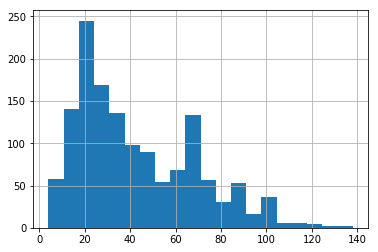

In [124]:
df.IBUs.hist(bins=20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [99]:
perIBU = df[df.IBUs > df.IBUs.quantile(0.75)]
perIBU



,Beer,Brewery,Location,Style,Size,ABV,IBUs
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.5,80.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0
21,Excess IPL,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,16 oz.,7.2,80.0
22,Hoponius Union,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,12 oz.,6.7,65.0
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
25,Solis,Mike Hess Brewing Company,"San Diego, CA",American IPA,16 oz.,7.5,85.0
27,Habitus,Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
46,Yeti Imperial Stout,Great Divide Brewing Company,"Denver, CO",Russian Imperial Stout,12 oz.,9.5,75.0


## List all of the beers with IBUs below the 25th percentile

In [120]:
df.dropna(subset=['IBUs'], inplace=True)
per2IBU = df[df.IBUs < df.IBUs.quantile(q=0.25)]
per2IBU

,Beer,Brewery,Location,Style,Size,ABV,IBUs
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0
12,Sho'nuff,Against the Grain Brewery,"Louisville, KY",Belgian Pale Ale,16 oz.,4.0,13.0
13,Bloody Show,Against the Grain Brewery,"Louisville, KY",American Pilsner,16 oz.,5.5,17.0
18,The Brown Note,Against the Grain Brewery,"Louisville, KY",English Brown Ale,16 oz.,5.0,20.0
19,House Lager,Jack's Abby Craft Lagers,"Framingham, MA",Keller Bier / Zwickel Bier,16 oz.,5.2,18.0
20,Leisure Time,Jack's Abby Craft Lagers,"Framingham, MA",American Pale Lager,12 oz.,4.8,15.0
30,Park,Fort Point Beer Company,"San Francisco, CA",American Pale Wheat Ale,12 oz.,4.7,19.0
31,Westfalia,Fort Point Beer Company,"San Francisco, CA",American Amber / Red Ale,12 oz.,5.6,16.0
32,KSA,Fort Point Beer Company,"San Francisco, CA",Kölsch,12 oz.,4.6,17.0
54,Sparkle,Petoskey Brewing,"Petoskey, MI",American Pale Lager,16 oz.,4.1,12.0


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [125]:
df.dropna(subset=['IBUs'], inplace=True)
medianIBU = df.groupby('Style').IBUs.median().sort_values(ascending=False)

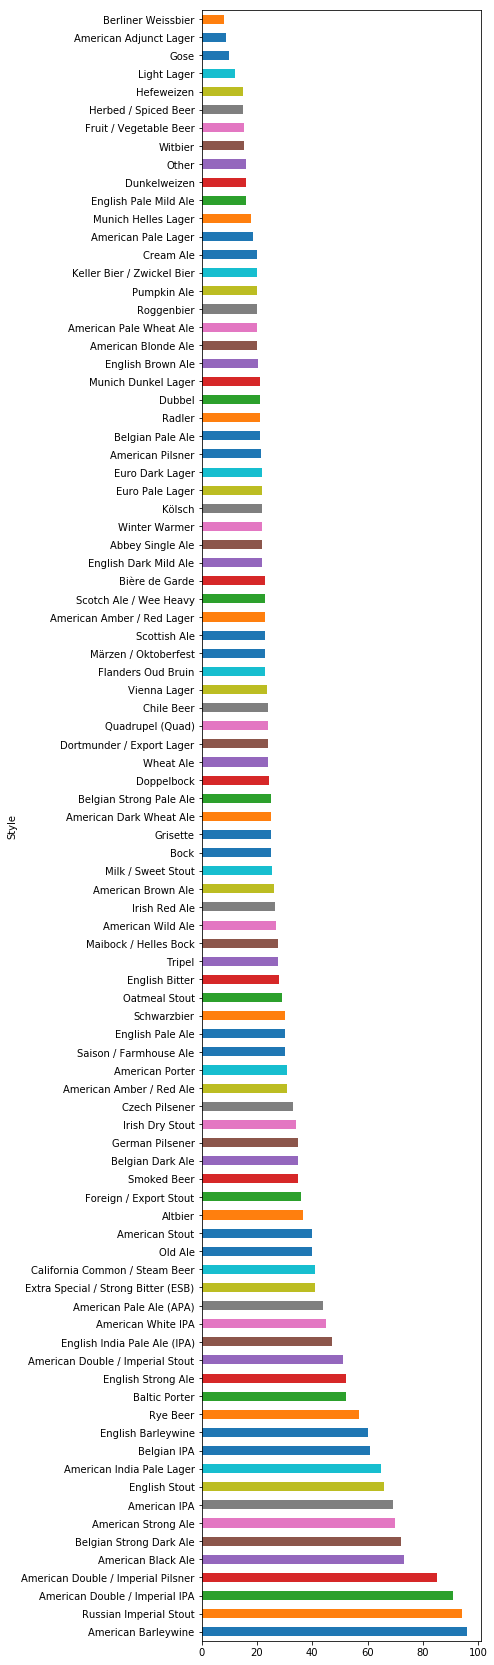

In [126]:
medianIBU.plot(kind="barh", figsize=(5,30))

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [105]:
perIBU.groupby(by='Style').Beer.count().sort_values(ascending=False).head(5)

Style
American IPA                      195
American Double / Imperial IPA     72
American Pale Ale (APA)            18
American Black Ale                 15
American Strong Ale                 9
Name: Beer, dtype: int64

In [106]:
per2IBU.groupby(by='Style').Beer.count().sort_values(ascending=False).head(5)

Style
American Pale Wheat Ale    43
American Blonde Ale        36
Fruit / Vegetable Beer     28
Hefeweizen                 21
Witbier                    20
Name: Beer, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [108]:
df[df.Style.isin(["Witbier", "Hefeweizen", "American Pale Wheat Ale"])].IBUs.mean()

18.982142857142858

In [117]:
df[df.Style.isin(["Witbier", "Hefeweizen", "American Pale Wheat Ale"])].IBUs.mean()

18.982142857142858

## Draw a histogram of the IBUs of those beers

In [116]:
df[df.Style.isin(["Witbier", "Hefeweizen", "American Pale Wheat Ale"])].IBUs.plot.hist

<bound method SeriesPlotMethods.hist of <pandas.plotting._core.SeriesPlotMethods object at 0x0E4A0430>>

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

## Plot those two histograms on top of one another

To plot two plots on top of one another, you do two steps.

1. First, you make a plot using `plot` or `hist`, and you save it into a variable called `ax`.
2. You draw your second graph using `plot` or `hist`, and send `ax=ax` to it as a parameter.

It would look something like this:

```python
ax = df.plot(....)
df.plot(ax=ax, ....)
``` 

(...except totally different)

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

## Good work!

If you made it this far you deserve a drink.